In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("./data/pokemon.xlsx")
df.head()

,#,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,001,Bulbasaur,GRASS,318,45,49,49,65,65,45
1,001,Bulbasaur,POISON,318,45,49,49,65,65,45
2,002,Ivysaur,GRASS,405,60,62,63,80,80,60
3,002,Ivysaur,POISON,405,60,62,63,80,80,60
4,003,Venusaur,GRASS,525,80,82,83,100,100,80


/tmp/ipykernel_6708/1685086458.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


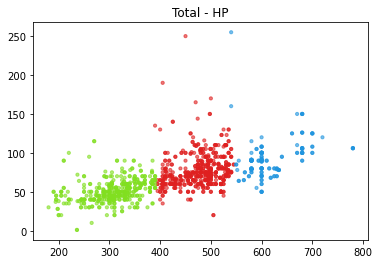

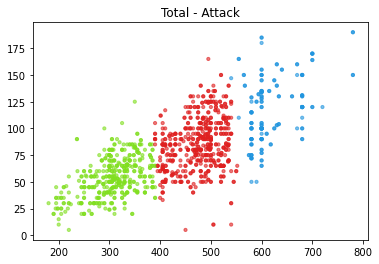

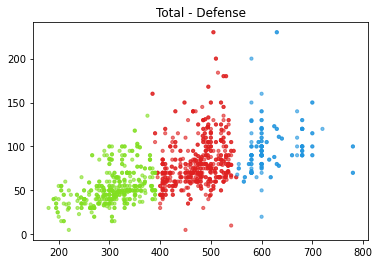

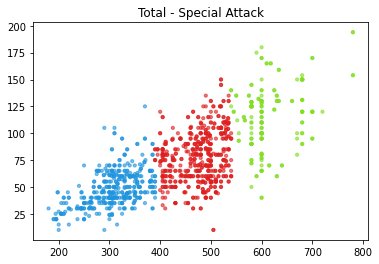

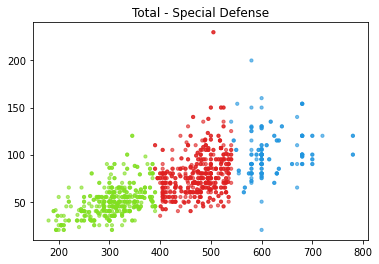

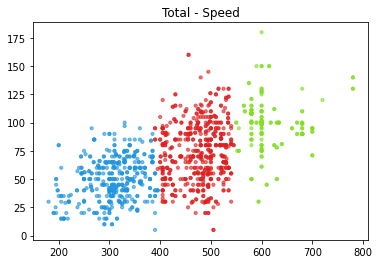

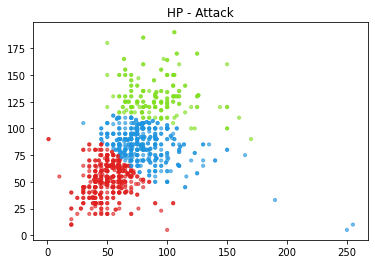

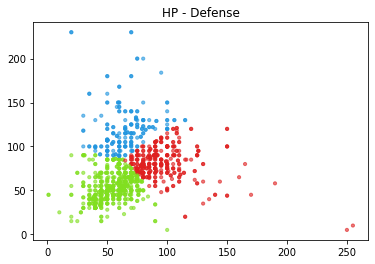

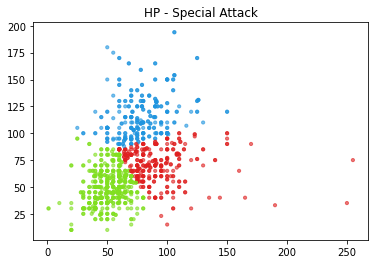

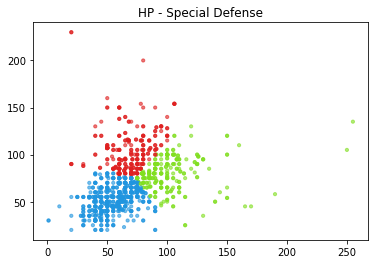

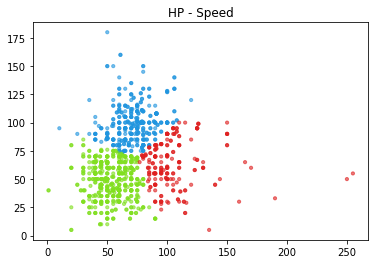

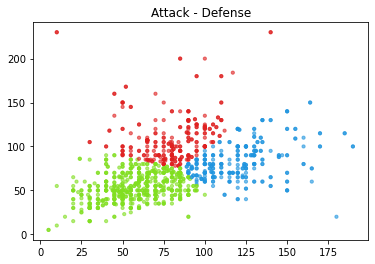

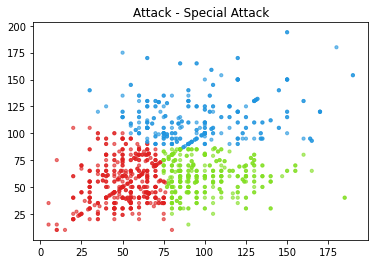

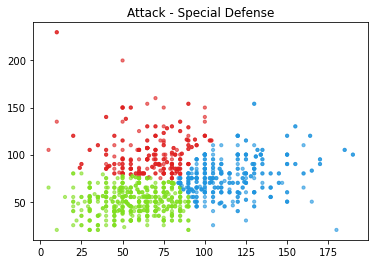

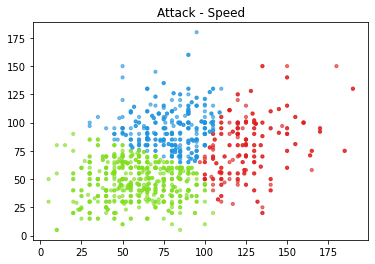

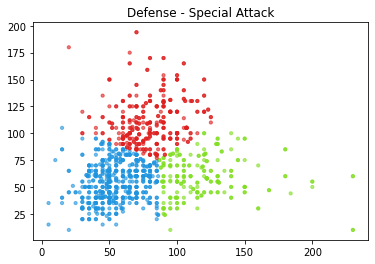

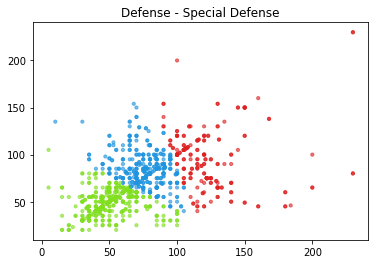

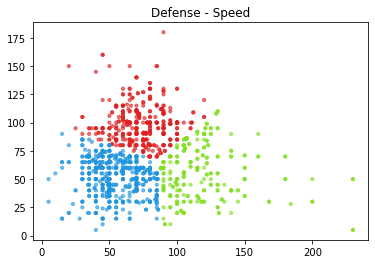

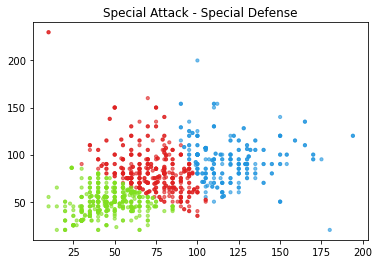

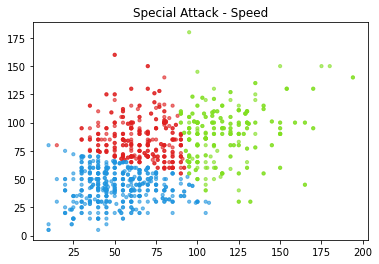

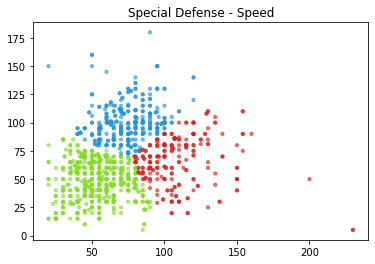

In [3]:
from sklearn.cluster import KMeans

columns = [
    'Total',
    'HP',
    'Attack',
    'Defense',
    'Special Attack',
    'Special Defense',
    'Speed'
]

for i, first_column in enumerate(columns):
    for j, second_column in enumerate(columns):
        if i >= j:
            continue
        kmeans = KMeans(n_clusters=3, random_state=0)

        df['cluster'] = kmeans.fit_predict(df[[first_column, second_column]]) # get centroids
        centroids = kmeans.cluster_centers_
        cen_x = [i[0] for i in centroids]
        cen_y = [i[1] for i in centroids]
        ## add to df
        df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
        df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})# define and map colors
        colors = ['#DF2020', '#81DF20', '#2095DF']
        df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

        plt.figure()
        plt.title(f"{first_column} - {second_column}")
        plt.scatter(df[first_column], df[second_column], c=df.c, alpha = 0.6, s=10)

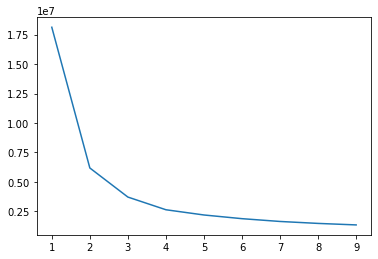

In [4]:
x = df[['Attack', 'Defense', 'Total']].to_numpy()
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)

In [7]:
import plotly.graph_objs as go

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit_predict(df[['Attack', 'Defense', 'HP']]) # get centroids

# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Attack'),yaxis = dict(title  = 'Defence'),zaxis = dict(title  = 'HP'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = kmeans.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()